In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.providers.aer import AerProvider
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
#from qiskit.providers.aer import QasmSimulator
from qiskit.quantum_info.operators import Operator
import numpy as np
from math import pi
from matplotlib import pyplot as plt

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-11-05 10:38:17,192: Credentials are already in use. The existing account in the session will be replaced.



P00
1345
1201
1624
1408
1291
1679
1444
1261
1696
1371
1303
1585
1371
1252
1634
1338
1246
1644
1425
1217
1619
1325
1203
1528
1327
1195
1485
1248
1230
1561
1298
1242
1530
1312
1156
1492
1340
1229
1541
1269
1222
1565
1322
1264
1554
1269
1294
1547
1249
1264

P01
640
2782
809
617
2719
814
651
2722
815
576
2669
774
631
2749
776
593
2819
776
582
2836
784
605
2752
763
487
2757
720
500
2818
768
504
2806
728
522
2814
700
485
2872
750
482
2762
638
392
2869
683
484
2774
655
428
2872

P10
889
267
2267
911
266
2276
946
273
2284
978
284
2317
858
278
2349
899
231
2382
902
229
2355
956
314
2446
972
299
2477
973
214
2481
933
205
2531
940
260
2590
943
177
2525
984
312
2466
904
183
2510
948
199
2653
931
172

P11
2126
750
300
2064
724
231
1959
744
205
2075
744
324
2140
721
241
2170
704
198
2091
718
242
2114
731
263
2214
749
318
2279
738
190
2265
747
211
2226
770
218
2232
722
184
2265
704
331
2382
684
253
2299
733
145
2392
692

N0
0.603
0.2034
0.5134
0.595
0.198
0.5014
0.581
0.2034
0.4978
0.6106
0.2056
0.5

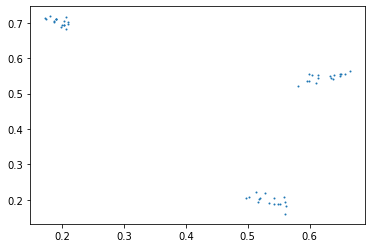

In [3]:
#QUANTUM SIMULATOR FOR RUNNING QUANTUM RECURRENT NEURAL NETWORK ON IBM'S QUANTUM COMPUTERS
# REFERENCE: Gonçalves CP (2022) Quantum Neural Networks, Computational Field Theory and Dynamics. Int J Swarm Evol Comput. 11: 246.

transient=1000
T=50
r = 0.550129597
backend= #PLACE BACKEND HERE
num_shots=5000
    

I = np.matrix([[1,0],[0,1]])
V = np.matrix([[0,-1],[1,0]])
Ur=np.cos(r*pi/2)*I + np.sin(r*pi/2)*V
P0 = np.matrix([[1,0],[0,0]])
P1 = np.matrix([[0,0],[0,1]])

U01=np.matrix(np.kron(P0,I))+np.matrix(np.kron(P1,Ur))
U10=np.matrix(np.kron(I,P0))+np.matrix(np.kron(Ur,P1))

Map = np.dot(U01,U10)

state = np.matrix([1/2,1/2,1/2,1/2]).T
states = []

for t in range(0,transient):
    state = np.dot(Map,state)
   
for t in range(0,T):
    state = np.dot(Map,state)
    states.append(state)


P00=[]
P01=[]
P10=[]
P11=[]
N0 = []
N1 = []
counts_results=[]

for state in states:
    n0 = QuantumRegister(1,'n0')
    n1 = QuantumRegister(1,'n1')
    c = ClassicalRegister(2,'c')
    
    Circuit = QuantumCircuit()
    Circuit.add_register(n0)
    Circuit.add_register(n1)
    Circuit.add_register(c)
    
    
    Circuit.initialize(state.T.tolist()[0])
    
    Circuit.measure(n0,c[0])
    Circuit.measure(n1,c[1])
       
    # Get the backend
    if backend == 'qasm_simulator':
        device = Aer.get_backend(backend) # use Aer if the backend is the 'qasm_simulator' (default)
    else:
        device = provider.get_backend(backend) # use the provider otherwise
        
    
    # Execute the circuit on the device for the number of shots defined
    job = execute(Circuit, device, shots=num_shots)
    
     # Get the simulation results for the repeated experiments
    result = job.result()
    
    # Extract the counts, and return them for further processing
    counts = result.get_counts(Circuit)
    
    counts_results.append(counts)
    
    keys=counts.keys()
    
    C01 = 0
    C10 = 0
    C11 = 0
    
    
    if '00' in keys:
        P00.append(counts['00'])
    else:
        P00.append(0)
        
    if '01' in keys:
        C01 = counts['01']
        P01.append(counts['01'])
    else:
        C01 = 0
        P01.append(0)
    
    if '10' in keys:
        C10 = counts['10']
        P10.append(counts['10'])
    else:
        C10 = 0
        P10.append(0)
        
    if '11' in keys:
        C11 = counts['11']
        P11.append(counts['11'])
    else:
        C11 = 0
        P11.append(0)
    
    
    N0.append((C10+C11)/num_shots)
    N1.append((C01+C11)/num_shots)
    

print("\nP00")

for t in range(0,len(P00)):
    print(P00[t])


print("\nP01")

for t in range(0,len(P01)):
    print(P01[t])
    
print("\nP10")

for t in range(0,len(P10)):
    print(P10[t])

print("\nP11")

for t in range(0,len(P11)):
    print(P11[t])
    
print("\nN0")
for t in range(0,len(N0)):
    print(N0[t])

print("\nN1")
for t in range(0,len(N1)):
    print(N1[t]) 
    
plt.scatter(N0,N1,s=1)
plt.show()

    

In [7]:
print("\nP00")

for t in range(0,len(P00)):
    print(P00[t])


print("\nP01")

for t in range(0,len(P01)):
    print(P01[t])
    
print("\nP10")

for t in range(0,len(P10)):
    print(P10[t])

print("\nP11")

for t in range(0,len(P11)):
    print(P11[t])
    
print("\nN0")
for t in range(0,len(N0)):
    print(N0[t])

print("\nN1")
for t in range(0,len(N1)):
    print(N1[t]) 
    


P00
1299
1469
1419
1342
1390
1391
1349
1410
1445
1314
1459
1412
1327
1377
1388
1317
1491
1423
1295
1481
1426
1278
1413
1392
1352
1466
1380
1286
1475
1405
1339
1392
1350
1353
1453
1382
1299
1405
1418
1314
1413
1384
1320
1489
1470
1256
1410
1397
1260
1503

P01
699
1727
1044
684
1738
1013
648
1754
1051
599
1761
1044
662
1827
1039
667
1696
955
589
1766
975
616
1812
998
592
1819
948
622
1789
962
607
1809
1011
531
1828
973
572
1851
969
566
1909
950
510
1866
947
563
1873
968
545
1866

P10
1479
781
1874
1410
725
1959
1462
760
1837
1440
687
1928
1476
681
1979
1412
669
2025
1486
613
2012
1487
655
2027
1441
620
2114
1442
650
2108
1456
648
2054
1450
633
2075
1440
635
2102
1396
567
2132
1427
587
2077
1390
576
2138
1397
537

P11
1523
1023
663
1564
1147
637
1541
1076
667
1647
1093
616
1535
1115
594
1604
1144
597
1630
1140
587
1619
1120
583
1615
1095
558
1650
1086
525
1598
1151
585
1666
1086
570
1689
1109
511
1724
1111
534
1743
1058
506
1791
1141
497
1798
1094

N0
0.6004
0.3608
0.5074
0.5948
0.3744
0